In [1]:
# API Key: 5F7QGJQDS6L1H1RS
# Stock API: https://www.alphavantage.co/documentation/
# API Data Endpoint: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&datatype=csv&apikey=

import pandas as pd
import ml_utilities as utils

stockprices = pd.read_csv("daily_AAPL2.csv", index_col="Date").sort_index()
test_ratio = 0.2
training_ratio = 1 - test_ratio
train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))
train = stockprices[:train_size][["Close"]]
test = stockprices[train_size:][["Close"]]

window_size = 50
window_var = f"{window_size}day"

print(f"train_size: {train_size}")
print(f"test_size: {test_size}")


train_size: 4896
test_size: 1224


rmse_ema: 34.426105587963924
rmse_ema: 9.868060299844208


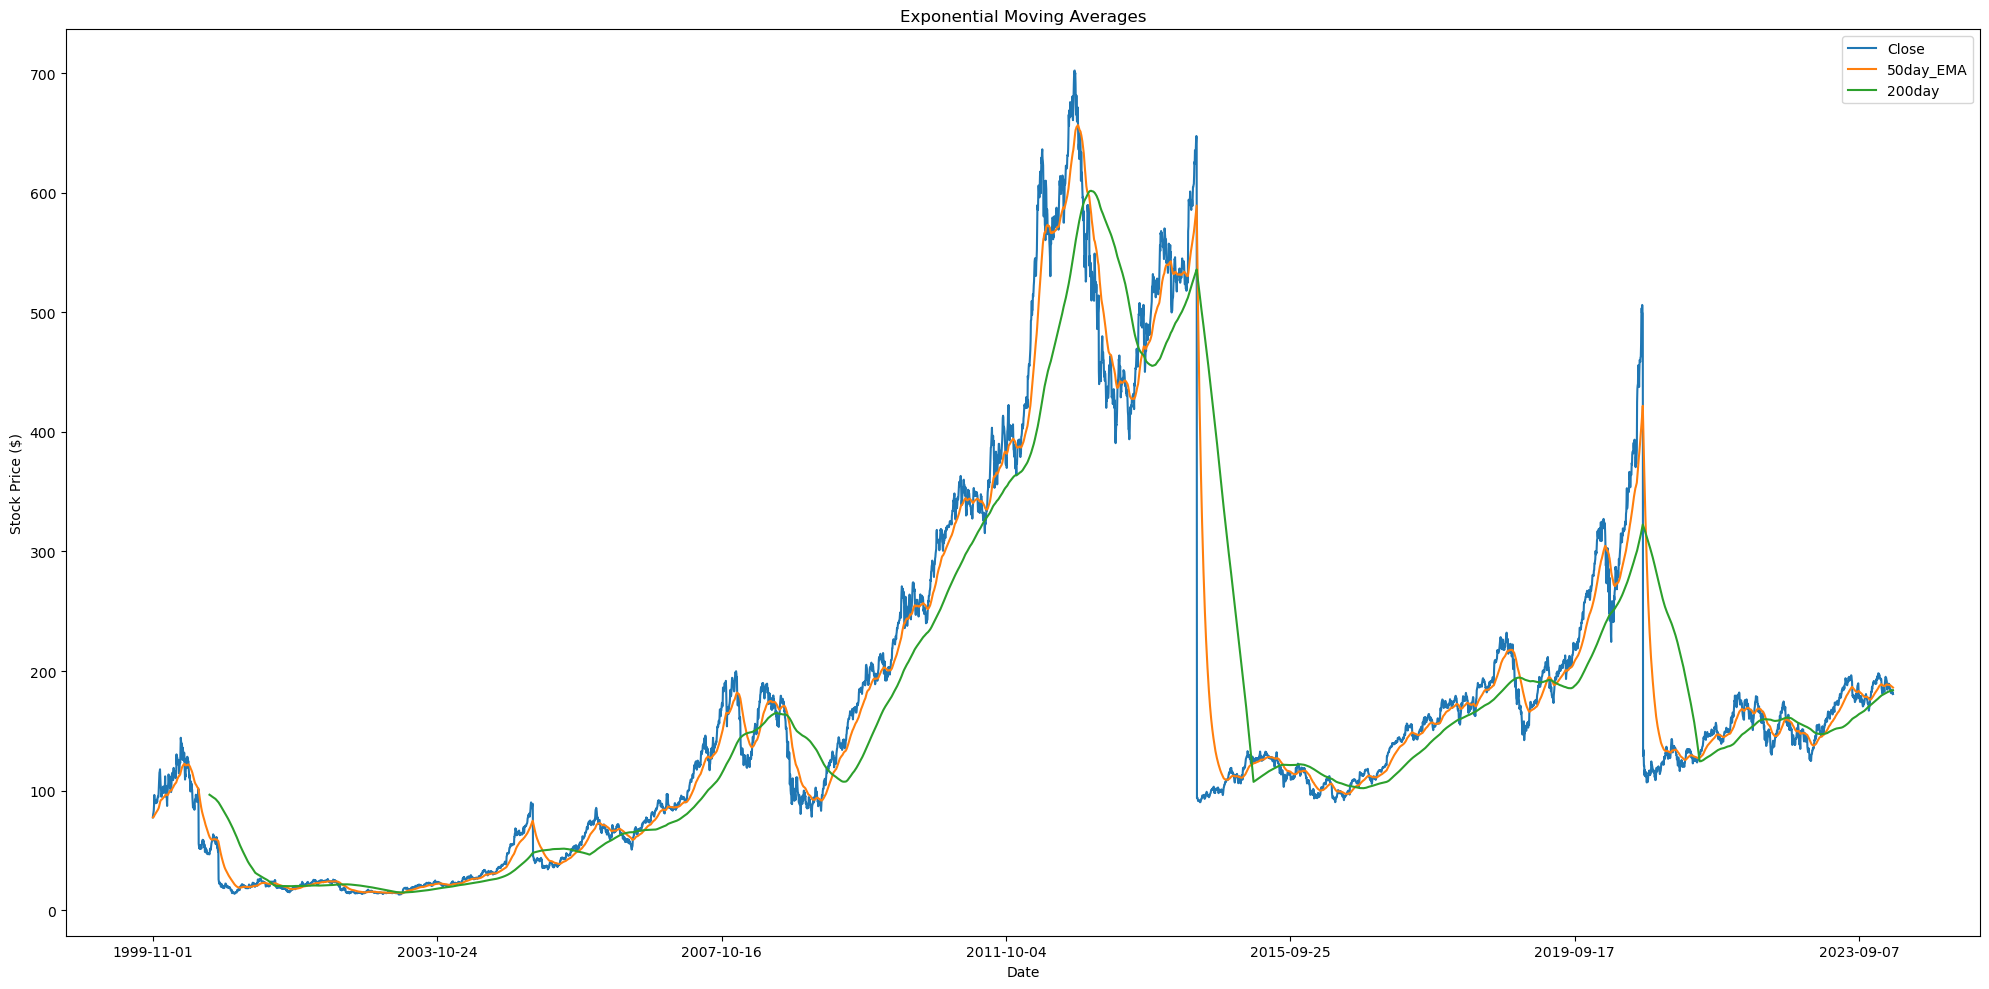

In [5]:
###### Exponential MA
window_ema_var = f"{window_var}_EMA"

# Calculate the 50-day exponentially weighted moving average
stockprices[window_ema_var] = (
    stockprices["Close"].ewm(span=window_size, adjust=False).mean()
)
stockprices["200day"] = stockprices["Close"].rolling(200).mean()

### Plot and performance metrics for EMA model
rmse_ema, mape_ema = utils.calculate_perf_metrics(window_ema_var, stockprices, train_size)
print(f"rmse_ema: {rmse_ema}")
print(f"rmse_ema: {mape_ema}")
utils.plot_stock_trend(
    window_ema_var, "Exponential Moving Averages", stockprices)